In [1]:
# imports
import sys
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal

In [2]:
params = {
    # exp
    "seed": 0,
    "runs": 1,
    "exp_name": "Depth",
    "cv_folds": 10,
    "plot": True,
    "calib_methods": ["RF", 
                      "Platt", "ISO", "Beta", "CRF", "VA",
                      "RF_ens_r", "RF_ens_k", "RF_large",
                     ],

    "metrics": ["acc", "tce", "logloss", "brier", "ece", "auc"],
    
    #data
    "data_name": "synthetic",
    "plot_data": True,
    "data_size": 1000,
    "n_features": 2,

    "class1_mean_min":0, 
    "class1_mean_max":1,
    "class2_mean_min":1, 
    "class2_mean_max":3, 

    # calib param
    "bin_strategy": "quantile",
    "ece_bins": 20,
    "boot_size": 5000,
    "boot_count": 40,

    "opt_cv":5, 
    "opt_n_iter":40,
    "opt_top_K": 5,
    "search_space": {
                    "n_estimators": [10],
                    "max_depth": [2,3,4,5,6,7,8,10,15,20,30,40,50,60,100],
                    "criterion": ["gini", "entropy"],
                    "max_features": ["sqrt", "log2"],
                    "min_samples_split": [2,3,4,5],
                    "min_samples_leaf": [1,2,3],
                    },

    # RF hyper opt
    "hyper_opt": "Manual",
    "n_estimators": 100,
}
exp_key = "depth"
exp_values = [1,2,3,4,5,6,7,8,9,10,20]


In [3]:
calib_results_dict, data_list = cx.run_exp(exp_key, exp_values, params)

In [4]:
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=True, 
                                    std=True)

In [5]:
for metric in params["metrics"]:
    print(metric, " ", params["calib_methods"][tables[metric].loc["Rank"].argmin()])
    tables[metric].to_csv(f"./results/{params['exp_name']}/{metric}.csv")


acc   RF
tce   RF_ens_k
logloss   RF_ens_k
brier   RF_ens_k
ece   RF_ens_k
auc   RF


In [6]:
print(params["calib_methods"][tables["tce"].loc["Rank"].argmin()])
tables["tce"]

RF_ens_k


,RF,Platt,ISO,Beta,CRF,VA,RF_ens_r,RF_ens_k,RF_large
Data,,,,,,,,,
1,0.007025,0.015014,0.020047,0.016026,0.021530,0.016608,0.030783,0.004430,0.030663
2,0.007025,0.007512,0.014718,0.008878,0.009534,0.010431,0.011917,0.004430,0.011947
3,0.007025,0.005087,0.011287,0.006276,0.005066,0.007612,0.005059,0.004430,0.005097
4,0.007025,0.005234,0.010434,0.005856,0.003919,0.006833,0.003417,0.004430,0.003405
5,0.007025,0.006262,0.011749,0.006564,0.005251,0.008020,0.003965,0.004430,0.003966
6,0.007025,0.007471,0.012490,0.007373,0.007593,0.009231,0.005535,0.004430,0.005519
7,0.007025,0.010069,0.014049,0.009551,0.010201,0.011105,0.007709,0.004430,0.007715
8,0.007025,0.011925,0.017630,0.011611,0.011964,0.014152,0.010132,0.004430,0.010196
9,0.007025,0.014291,0.018676,0.013824,0.014316,0.015744,0.012717,0.004430,0.012752


In [7]:
print(params["calib_methods"][tables["brier"].loc["Rank"].argmin()])
tables["brier"]

RF_ens_k


,RF,Platt,ISO,Beta,CRF,VA,RF_ens_r,RF_ens_k,RF_large
Data,,,,,,,,,
1,0.148409,0.160220,0.165755,0.160857,0.163315,0.160681,0.175028,0.146136,0.174896
2,0.148409,0.151088,0.158038,0.151969,0.151950,0.153864,0.155504,0.146136,0.155524
3,0.148409,0.147845,0.155901,0.148183,0.147328,0.151277,0.147802,0.146136,0.147853
4,0.148409,0.147304,0.152393,0.146726,0.145489,0.147657,0.145838,0.146136,0.145750
5,0.148409,0.148270,0.152822,0.147236,0.146261,0.150083,0.146336,0.146136,0.146364
6,0.148409,0.149667,0.154494,0.147776,0.148976,0.150478,0.148270,0.146136,0.148343
7,0.148409,0.153156,0.155430,0.150482,0.152691,0.152784,0.151118,0.146136,0.151330
8,0.148409,0.155454,0.160530,0.153105,0.155592,0.157602,0.154471,0.146136,0.154665
9,0.148409,0.158602,0.162605,0.156816,0.158442,0.160075,0.157910,0.146136,0.158021


In [8]:
print(params["calib_methods"][tables["logloss"].loc["Rank"].argmin()])
tables["logloss"]

RF_ens_k


,RF,Platt,ISO,Beta,CRF,VA,RF_ens_r,RF_ens_k,RF_large
Data,,,,,,,,,
1,0.453606,0.490696,0.902288,0.497800,0.501117,0.497222,0.533531,0.447632,0.533271
2,0.453606,0.464868,1.128724,0.470987,0.468951,0.472158,0.481683,0.447632,0.481750
3,0.453606,0.454578,1.185500,0.458523,0.453981,0.462991,0.456799,0.447632,0.457077
4,0.453606,0.452238,1.110773,0.454796,0.445258,0.452389,0.447476,0.447632,0.447243
5,0.453606,0.454432,1.209142,0.458010,0.447075,0.460080,0.446246,0.447632,0.446616
6,0.453606,0.457706,1.117248,0.455017,0.451331,0.458980,0.451013,0.447632,0.451376
7,0.453606,0.466879,1.119592,0.463034,0.465497,0.467771,0.459626,0.447632,0.460470
8,0.453606,0.474178,1.232658,0.472575,0.478220,0.480321,0.470329,0.447632,0.471234
9,0.453606,0.483076,1.205679,0.486209,0.495156,0.489148,0.483198,0.447632,0.483238


In [9]:
print(params["calib_methods"][tables["ece"].loc["Rank"].argmin()])
tables["ece"]

RF_ens_k


,RF,Platt,ISO,Beta,CRF,VA,RF_ens_r,RF_ens_k,RF_large
Data,,,,,,,,,
1,0.003315,0.005100,0.006707,0.005331,0.010986,0.001298,0.021281,0.002683,0.020378
2,0.003315,0.005205,0.006729,0.004001,0.004527,0.002891,0.007536,0.002683,0.007343
3,0.003315,0.004179,0.004490,0.004027,0.004556,0.003979,0.003509,0.002683,0.003709
4,0.003315,0.005413,0.003973,0.005824,0.003634,0.002257,0.003456,0.002683,0.003114
5,0.003315,0.005297,0.003885,0.005979,0.003060,0.002185,0.003037,0.002683,0.002986
6,0.003315,0.006503,0.006199,0.005068,0.005094,0.002136,0.003619,0.002683,0.004065
7,0.003315,0.007453,0.004264,0.005123,0.005709,0.003502,0.003948,0.002683,0.004640
8,0.003315,0.005730,0.010677,0.003177,0.006661,0.003863,0.004944,0.002683,0.005367
9,0.003315,0.005175,0.004852,0.003287,0.007405,0.002471,0.006255,0.002683,0.006780


### Comparison of other metrics to TCE

In [10]:
import scipy.stats as stats
import numpy as np

tce_ranks = np.array(tables["tce"].loc["Rank"])
ece_ranks = np.array(tables["ece"].loc["Rank"])
brier_ranks = np.array(tables["brier"].loc["Rank"])
logloss_ranks = np.array(tables["logloss"].loc["Rank"])
acc_ranks = np.array(tables["acc"].loc["Rank"])
auc_ranks = np.array(tables["auc"].loc["Rank"])

tau, p_value = stats.kendalltau(tce_ranks, brier_ranks)
print(f"tau {tau} p_value {p_value}")

tau 0.7606388292556648 p_value 0.004649433819808542


In [11]:
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=False, 
                                    std=True)

In [12]:
plot_calib_methods = params["calib_methods"].copy()
# plot_calib_methods.remove("Rank")
# plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("RF")
plot_calib_methods

['RF', 'Platt', 'ISO', 'Beta', 'CRF', 'VA', 'RF_ens_r', 'RF_ens_k', 'RF_large']

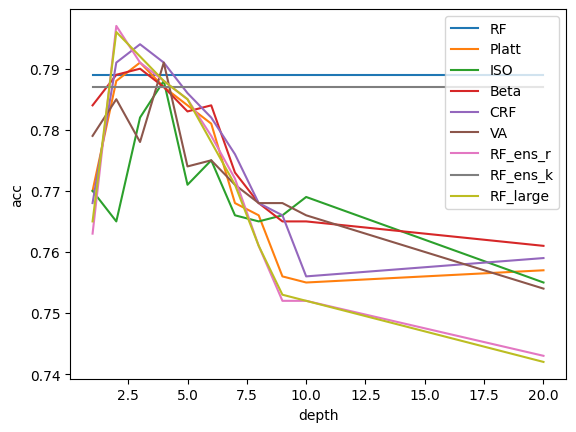

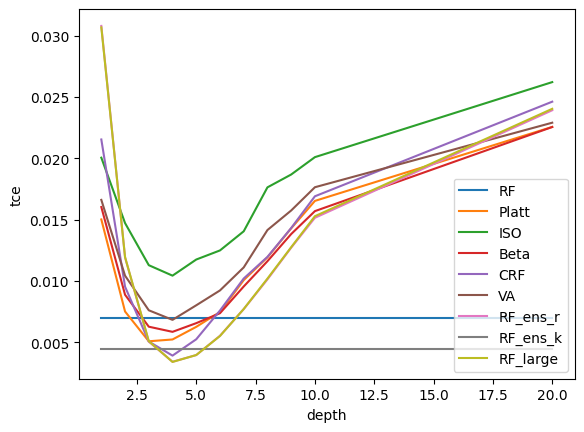

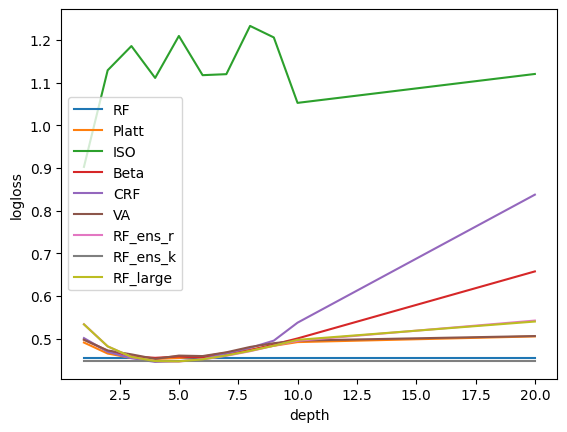

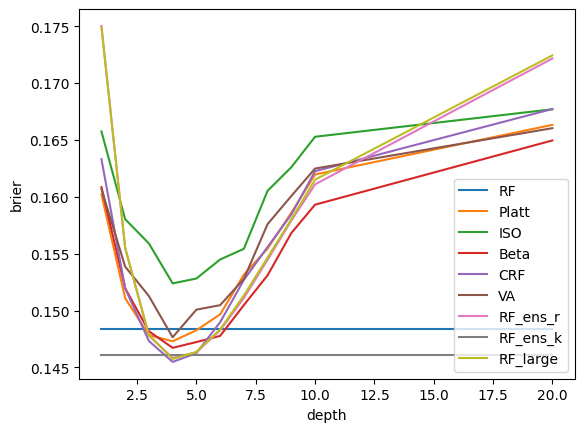

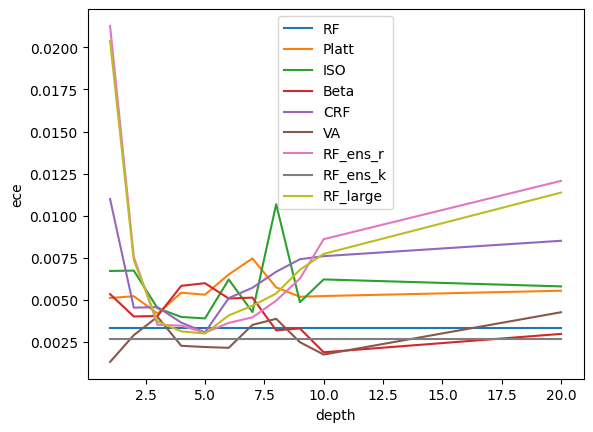

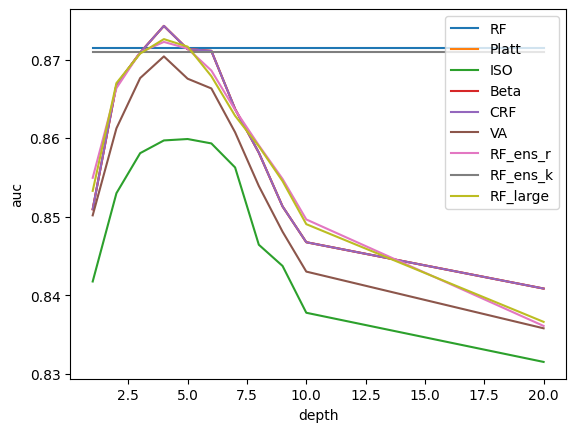

In [13]:
for metric in params["metrics"]:
    ax = tables[metric][plot_calib_methods].plot()
    ax.set_xlabel(exp_key)
    ax.set_ylabel(metric)